In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("pima.csv")

In [4]:
df.sample(2)

,6,148,72,35,0,33.6,0.627,50,1
50,1,101,50,15,36,24.2,0.526,26,0
471,0,119,66,27,0,38.8,0.259,22,0


In [6]:
df.column

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [7]:
df.corr()['1']

6        0.221087
148      0.465856
72       0.064882
35       0.073265
0        0.131984
33.6     0.292695
0.627    0.173245
50       0.236417
1        1.000000
Name: 1, dtype: float64

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [10]:
x = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x.shape

(767, 8)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [15]:
model = keras.Sequential([
    keras.layers.Dense(32,input_shape=(8,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5139 - val_loss: 0.6791 - val_accuracy: 0.6299
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6476 - val_loss: 0.6671 - val_accuracy: 0.6299
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6574 - val_loss: 0.6602 - val_accuracy: 0.6299
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6574 - val_loss: 0.6562 - val_accuracy: 0.6299
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6574 - val_loss: 0.6529 - val_accuracy: 0.6299
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6574 - val_loss: 0.6503 - val_accuracy: 0.6299
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6574 - val_loss: 0.6482 - val_accuracy: 0.6299
Epoch 8/10
20/20 [=

How to select Optimizer
Number of Nodes
Number of layers

In [17]:
!pip install keras_tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.5 MB/s eta 0:00:00


In [22]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Dense(32,input_shape=(8,),activation="relu"),
      keras.layers.Dense(1,activation="sigmoid")
  ])
  model.compile(
      optimizer = hp.Choice('optimizer',values=['adam','SGD','RMSprop','Adadelta','Adagrad','Nadam']),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )
  return model

In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5)

In [25]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.37012988328933716

Best val_accuracy So Far: 0.6363636255264282
Total elapsed time: 00h 00m 07s


In [26]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'SGD'}

In [28]:
model = tuner.get_best_models(num_models=1)[0]

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,epochs=100,initial_epoch=6,batch_size=32,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.6542 - val_loss: 0.6855 - val_accuracy: 0.6364
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6558 - val_loss: 0.6829 - val_accuracy: 0.6364
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6574 - val_loss: 0.6813 - val_accuracy: 0.6299
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6574 - val_loss: 0.6798 - val_accuracy: 0.6299
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6574 - val_loss: 0.6788 - val_accuracy: 0.6299
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6574 - val_loss: 0.6779 - val_accuracy: 0.6299
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6574 - val_loss: 0.6769 - val_accuracy: 0.6299
Epoch 14/

Now we have to decide number of neurons

In [39]:
def build_model(hp):
  model = keras.Sequential()
  units = hp.Int('units',8,128,step=8)
  model.add(keras.layers.Dense(units=units,activation='relu',input_shape=(8,)))
  model.add(keras.layers.Dense(1,activation="sigmoid"))

  model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [40]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir')

In [41]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.6298701167106628

Best val_accuracy So Far: 0.6688311696052551
Total elapsed time: 00h 00m 06s


In [42]:
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [43]:
model = tuner.get_best_models(num_models=1)[0]

In [45]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6574 - val_loss: 0.6450 - val_accuracy: 0.6299
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.6574 - val_loss: 0.6441 - val_accuracy: 0.6299
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6574 - val_loss: 0.6433 - val_accuracy: 0.6299
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6574 - val_loss: 0.6426 - val_accuracy: 0.6299
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6574 - val_loss: 0.6420 - val_accuracy: 0.6299
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6574 - val_loss: 0.6414 - val_accuracy: 0.6299
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6574 - val_loss: 0.6408 - val_accuracy: 0.6299
Epoch 14/

How to select number of layers

In [46]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(72,activation='relu',input_shape=(8,)))
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(keras.layers.Dense(72,activation='relu'))

  model.add(keras.layers.Dense(1,activation='sigmoid'))
  model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

  return model

In [47]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='layer_selection')

In [50]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6298701167106628

Best val_accuracy So Far: 0.6298701167106628
Total elapsed time: 00h 00m 08s


In [51]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10}

In [52]:
model = tuner.get_best_models(num_models=1)[0]

In [53]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 10ms/step - loss: 0.6812 - accuracy: 0.6574 - val_loss: 0.6799 - val_accuracy: 0.6299
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.6574 - val_loss: 0.6752 - val_accuracy: 0.6299
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.6574 - val_loss: 0.6711 - val_accuracy: 0.6299
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6574 - val_loss: 0.6680 - val_accuracy: 0.6299
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6574 - val_loss: 0.6663 - val_accuracy: 0.6299
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.6574 - val_loss: 0.6644 - val_accuracy: 0.6299
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6574 - val_loss: 0.6626 - val_accuracy: 0.6299
Epoch 14

In [114]:
def build_model(hp):
  model = keras.Sequential()

  counter = 0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

    if counter == 0:
      model.add(keras.layers.Dense(
          hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
          activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
          input_shape=(8,)
          ))
      # model.add(keras.layers.Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else:
      model.add(keras.layers.Dense(
          hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
          activation = hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
          ))
      # model.add(keras.layers.Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
      counter = counter + 1

    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values=['adam','SGD','RMSprop','Nadam']),
                                      loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [115]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='check_accuracy')

In [116]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.6298701167106628

Best val_accuracy So Far: 0.6298701167106628
Total elapsed time: 00h 00m 06s


In [117]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3, 'units0': 80, 'activation0': 'tanh', 'optimizer': 'SGD'}

In [118]:
model = tuner.get_best_models(num_models=1)[0]

In [119]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6577 - accuracy: 0.6574 - val_loss: 0.6714 - val_accuracy: 0.6299
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6574 - val_loss: 0.6704 - val_accuracy: 0.6299
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6574 - val_loss: 0.6695 - val_accuracy: 0.6299
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.6574 - val_loss: 0.6683 - val_accuracy: 0.6299
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6574 - val_loss: 0.6672 - val_accuracy: 0.6299
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6574 - val_loss: 0.6664 - val_accuracy: 0.6299
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6574 - val_loss: 0.6657 - val_accuracy: 0.6299
Epoch 14/

In [120]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.6753


[0.5875348448753357, 0.6753246784210205]

In [121]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 2ms/step


In [122]:
y_predict = []

for i in y_pred:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)

In [123]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.14127202857094168

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [125]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79        97
           1       0.77      0.18      0.29        57

    accuracy                           0.68       154
   macro avg       0.72      0.57      0.54       154
weighted avg       0.70      0.68      0.60       154



Text(70.72222222222221, 0.5, 'Truth')

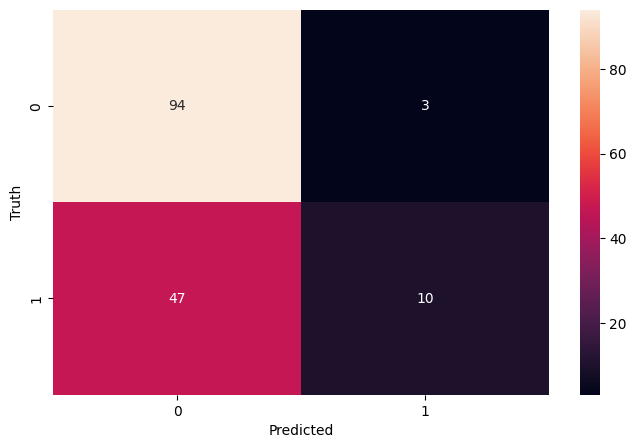

In [126]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')